In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

# Data preparation

In [4]:
df = pd.read_csv(r"C:\Users\rvima\MP OG - Copy\Crop_production_.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [5]:
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (99849, 13)


# Data Pre-Processing

In [6]:
df.isnull().sum()

Unnamed: 0            0
State_Name            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64

In [7]:
del df['Unnamed: 0']

In [8]:
df.isnull().sum()

State_Name            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64

In [9]:
df['Crop'].value_counts()

Crop
rice           11430
maize           9857
moong           6855
sesamum         6291
wheat           6225
rapeseed        5413
jowar           5369
potato          5324
onion           5164
sunflower       3682
cotton          3157
barley          3139
ragi            2995
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2409
soyabean        2325
coriander       2253
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       732
blackpepper      571
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
jackfruit         90
drumstick         73
cucumber          72
bittergourd       67
watermelon        59
blackgram         58
bottlegourd       58
radish            45
pumpkin           37
carrot            28
ashgourd          28
pomegran

In [10]:
# Filter the DataFrame to only include rows where the 'Crop' is 'Rice'
rice_df = df[(df['Crop'] == 'rice')]
# Display the first few rows of the rice data to verify
print(rice_df.head())

# Checking the shape of the new DataFrame to see how many entries are about rice
print("Shape of the rice dataset:", rice_df.shape)

        State_Name Crop_Type  Crop   N   P   K    pH  rainfall  temperature  \
6   andhra pradesh    kharif  rice  80  40  40  5.54    654.34    29.266667   
12  andhra pradesh      rabi  rice  80  40  40  5.54    288.30    25.460000   
20  andhra pradesh    kharif  rice  80  40  40  5.50    654.34    29.266667   
25  andhra pradesh      rabi  rice  80  40  40  5.40    288.30    25.460000   
31  andhra pradesh    kharif  rice  80  40  40  5.34    654.34    29.266667   

    Area_in_hectares  Production_in_tons  Yield_ton_per_hec  
6            35600.0             75400.0           2.117978  
12           18000.0             37300.0           2.072222  
20           42300.0             84400.0           1.995272  
25           57400.0            137400.0           2.393728  
31          214100.0            429300.0           2.005138  
Shape of the rice dataset: (11430, 12)


In [11]:
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11430 entries, 6 to 99847
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          11430 non-null  object 
 1   Crop_Type           11430 non-null  object 
 2   Crop                11430 non-null  object 
 3   N                   11430 non-null  int64  
 4   P                   11430 non-null  int64  
 5   K                   11430 non-null  int64  
 6   pH                  11430 non-null  float64
 7   rainfall            11430 non-null  float64
 8   temperature         11430 non-null  float64
 9   Area_in_hectares    11430 non-null  float64
 10  Production_in_tons  11430 non-null  float64
 11  Yield_ton_per_hec   11430 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1.1+ MB


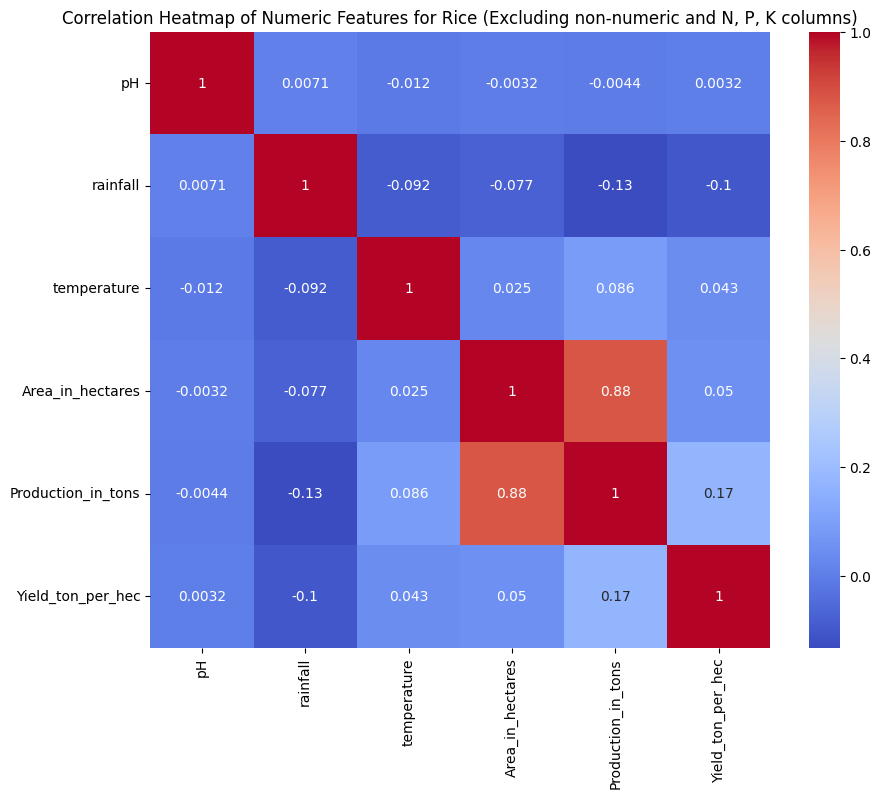

In [12]:
# Exclude 'N', 'P', and 'K' columns from correlation calculation
rice_numeric = rice_df.drop(columns=['N', 'P', 'K'])

# Exclude non-numeric columns and 'N', 'P', 'K' columns from correlation calculation
rice_numeric = rice_df.drop(columns=['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K'])

plt.figure(figsize=(10,8))
sns.heatmap(rice_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features for Rice (Excluding non-numeric and N, P, K columns)')
plt.show()

In [13]:
rice_df.duplicated().sum()

0

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Splitting the data into training and testing sets

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
print(rice_df.columns)

Index(['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')


# Data splitting

In [17]:
X=rice_df[['pH','rainfall','temperature','Area_in_hectares']]
Y=rice_df['Production_in_tons']

In [18]:
X

,pH,rainfall,temperature,Area_in_hectares
6,5.54,654.34,29.266667,35600.0
12,5.54,288.30,25.460000,18000.0
20,5.50,654.34,29.266667,42300.0
25,5.40,288.30,25.460000,57400.0
31,5.34,654.34,29.266667,214100.0
...,...,...,...,...
99829,5.64,182.50,29.200000,98567.0
99831,5.40,152.54,22.280000,88778.0
99836,5.32,1166.94,28.333333,122.0
99846,5.64,182.50,29.200000,105.0


In [19]:
Y

6         75400.0
12        37300.0
20        84400.0
25       137400.0
31       429300.0
           ...   
99829    348095.0
99831    201733.0
99836        35.0
99846       281.0
99847    261435.0
Name: Production_in_tons, Length: 11430, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [22]:
X_train

,pH,rainfall,temperature,Area_in_hectares
70487,5.62,182.500000,29.200000,39320.0
84117,5.68,770.440000,28.680000,152852.0
44362,5.38,1011.490000,30.430000,6103.0
3834,5.50,579.750000,34.010000,81826.0
59217,5.66,330.000000,29.333333,82.0
...,...,...,...,...
2385,5.56,423.745000,22.070000,17301.0
455,5.44,497.880000,25.033333,160.0
70530,5.40,182.500000,29.200000,147552.0
60879,5.44,10.265748,25.760000,6136.0


In [23]:
X_test

,pH,rainfall,temperature,Area_in_hectares
79255,5.42,87.2000,23.106000,39639.0
93707,5.50,87.2000,23.106000,42986.0
89520,5.50,235.4251,26.646667,5257.0
22473,5.42,411.5200,34.730000,357000.0
67634,5.56,1145.2200,28.500000,63000.0
...,...,...,...,...
46940,5.56,297.6600,29.566667,70722.0
16626,5.56,579.7500,34.010000,31898.0
36958,5.42,1145.2200,28.500000,122000.0
18001,5.66,654.3400,29.266667,129907.0


In [24]:
X_train

,pH,rainfall,temperature,Area_in_hectares
70487,5.62,182.500000,29.200000,39320.0
84117,5.68,770.440000,28.680000,152852.0
44362,5.38,1011.490000,30.430000,6103.0
3834,5.50,579.750000,34.010000,81826.0
59217,5.66,330.000000,29.333333,82.0
...,...,...,...,...
2385,5.56,423.745000,22.070000,17301.0
455,5.44,497.880000,25.033333,160.0
70530,5.40,182.500000,29.200000,147552.0
60879,5.44,10.265748,25.760000,6136.0


In [25]:
Y_train

70487    110708.0
84117    459932.0
44362      8572.0
3834     160619.0
59217        89.0
           ...   
2385      22730.0
455         192.0
70530    471355.0
60879     14266.0
50323      1400.0
Name: Production_in_tons, Length: 9144, dtype: float64

# Models

In [26]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
from IPython.display import display

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    
    results.append([name, mae, r2])

# Create DataFrame for results
df_models = pd.DataFrame(results, columns=['Method', 'MAE', 'R2'])

# Additional results DataFrames
# Assuming you have defined decision_tree_mae, decision_tree_r2, Ridge_mae, Ridge_r2, Random_forest_mae, and Random_forest_r2



# Concatenate all results DataFrames
df_models = pd.concat([df_models], axis=0).reset_index(drop=True)

# Display the combined DataFrame
display(df_models)

,Method,MAE,R2
0,Linear Regression,40775.716722,0.787515
1,Ridge Regression,40775.714422,0.787515
2,Decision Tree Regressor,24715.751627,0.891397
3,Random Forest Regressor,19055.213806,0.936001


# Select Model

In [34]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
dtr.predict(X_test)

Rid = Ridge()
Rid.fit(X_train,Y_train)
Rid.predict(X_test)

lss = Lasso()
lss.fit(X_train,Y_train)
lss.predict(X_test)

rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
rf.predict(X_test)

lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.predict(X_test)

array([ 81958.48954578,  89319.2306867 ,  12101.06161852, ...,
       249301.31852455, 278445.82214438,  37752.72564163])

# Stacking Regression

In [35]:
from sklearn.ensemble import StackingRegressor

In [36]:
estimators_dr=[
    ('linear',lr),
    ('Ridge',Rid),
    ('Random',rf)
]

In [37]:
sr_Decision=StackingRegressor(
estimators=estimators_dr,
final_estimator=dtr)

In [38]:
estimators_lr=[
    ('Decision',dtr),
    ('Ridge',Rid),
    ('Random',rf)
]

In [39]:
sr_Linear=StackingRegressor(
estimators=estimators_lr,
final_estimator=lr)

In [40]:
estimators_ridge=[
    ('Decision',dtr),
    ('linear',lr),
    ('Random',rf)
]

In [41]:
sr_Ridge=StackingRegressor(
estimators=estimators_ridge,
final_estimator=Rid)

In [42]:
estimators_Random=[
    ('Decision',dtr),
    ('linear',lr),
    ('Ridge',Rid)
]

In [43]:
sr_Random=StackingRegressor(
estimators=estimators_Random,
final_estimator=rf)

In [44]:
sr_Decision.fit(X_train,Y_train)

StackingRegressor(estimators=[('linear', LinearRegression()),
                              ('Ridge', Ridge()),
                              ('Random', RandomForestRegressor())],
                  final_estimator=DecisionTreeRegressor())

In [45]:
sr_Linear.fit(X_train,Y_train)

StackingRegressor(estimators=[('Decision', DecisionTreeRegressor()),
                              ('Ridge', Ridge()),
                              ('Random', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [46]:
sr_Random.fit(X_train,Y_train)

StackingRegressor(estimators=[('Decision', DecisionTreeRegressor()),
                              ('linear', LinearRegression()),
                              ('Ridge', Ridge())],
                  final_estimator=RandomForestRegressor())

In [47]:
sr_Ridge.fit(X_train,Y_train)

StackingRegressor(estimators=[('Decision', DecisionTreeRegressor()),
                              ('linear', LinearRegression()),
                              ('Random', RandomForestRegressor())],
                  final_estimator=Ridge())

In [48]:
y_stackpredic_Decisiontree=t=sr_Decision.predict(X_test)

In [49]:
y_stackpredic_Random=sr_Random.predict(X_test)

In [50]:
y_stackpredic_Ridge=sr_Ridge.predict(X_test)

In [51]:
y_stackpredic_Linear=sr_Linear.predict(X_test)

# MAE of stacking regressor

In [52]:
decision_tree_mae=mean_absolute_error(Y_test,y_stackpredic_Decisiontree)

In [53]:
Random_forest_mae=mean_absolute_error(Y_test,y_stackpredic_Random)

In [54]:
Ridge_mae=mean_absolute_error(Y_test,y_stackpredic_Ridge)

In [55]:
Linear_mae=mean_absolute_error(Y_test,y_stackpredic_Linear)

# R2 values of Stacking Regressor

In [56]:
decision_tree_r2=r2_score(Y_test,y_stackpredic_Decisiontree)

In [57]:
Random_forest_r2=r2_score(Y_test,y_stackpredic_Random)

In [58]:
Ridge_r2=r2_score(Y_test,y_stackpredic_Ridge)

In [59]:
Linear_r2=r2_score(Y_test,y_stackpredic_Linear)

In [61]:
# Create DataFrames for each model
rf_results = pd.DataFrame([['Final Estimator-Random Forest Regressor', Random_forest_mae, Random_forest_r2]], columns=['StackingMethod', 'MAE', 'R2'])
dt_results = pd.DataFrame([['Final Estimator-Decision Tree Regressor', decision_tree_mae, decision_tree_r2]], columns=['StackingMethod', 'MAE', 'R2'])
Rid_results = pd.DataFrame([['Final Estimator-Ridge', Ridge_mae, Ridge_r2]], columns=['StackingMethod', 'MAE', 'R2'])
Linear_results = pd.DataFrame([['Final Estimator-Linear Regressor', Linear_mae, Linear_r2]], columns=['StackingMethod', 'MAE', 'R2'])

# Concatenate the results nto a single DataFrame
df_models = pd.concat([dt_results, rf_results, Rid_results, Linear_results], axis=0).reset_index(drop=True)

# Display the combined DataFrame
df_models

,StackingMethod,MAE,R2
0,Final Estimator-Decision Tree Regressor,28142.568097,0.864921
1,Final Estimator-Random Forest Regressor,23050.080722,0.910798
2,Final Estimator-Ridge,19420.835837,0.935494
3,Final Estimator-Linear Regressor,19424.909585,0.935683


# Prediction function

In [62]:
def prediction(pH, rainfall, temperature, Area_in_hectares):
    # Create an array of the input features
    features = np.array([[pH, rainfall, temperature, Area_in_hectares]])

    # Make the prediction directly using the trained model
    predicted_yield = dtr.predict(features)

    return predicted_yield[0]

# Example input values
pH =5.34
rainfall = 330.00
temperature =29.333333
Area_in_hectares = 19058.00

# Make prediction
result = prediction(pH, rainfall, temperature, Area_in_hectares)

print("Predicted yield:", result)

Predicted yield: 47620.0


# Pickle files

In [63]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))

In [64]:
import sklearn
print(sklearn.__version__)

1.2.2
